In [1]:
import sys
# sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/MCPC_Clustering/Codes')
sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

In [2]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm
# from Custom_Func import directed_modularity, modularity, _one_level


In [3]:
%load_ext autoreload
%autoreload 2
import importlib

import Real_Custom_v2 as Real_Custom
Real_Custom = importlib.reload(Real_Custom)

import FlowRank as FR
FR=importlib.reload(FR)

# Directed Graph

In [5]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<n_s//2 and j <n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.3):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.8):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])

# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
# nx.draw(G, with_labels=True)

## Louvain Partition on G

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}]
Time taken for original Louvain: 0.025607585906982422
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}, {51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}]
Time taken for our implementation: 0.03663778305053711


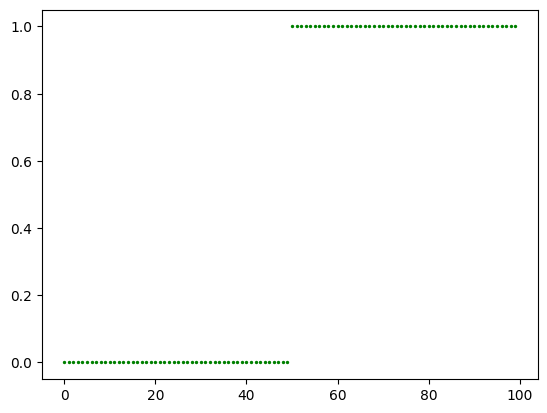

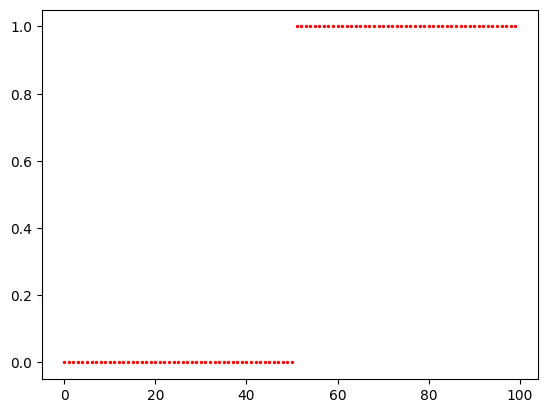

The NMI score of original Louvain compared to true label: 1.0
The NMI score of our implementation compared to true label: 0.929
Are the two partitions same? False


In [8]:
import debug as debug
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import itertools
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

nx_comm.louvain._one_level=debug._one_level


#run time recording
import time
start = time.time()
og_partition = nx_comm.louvain.louvain_partitions(G, seed=0)

final_partition_1 = deque(og_partition, maxlen=1).pop()
end = time.time()


print(final_partition_1)

print("Time taken for original Louvain:",end-start)

label_1=np.zeros((n_s))
c=0
for sets in final_partition_1:
    for ell in sets:
        label_1[ell]=c
    
    c=c+1


start = time.time()
partition = Real_Custom.louvain_partitions(G, seed=0)

final_partition_2 = deque(partition, maxlen=1).pop()
end = time.time()
print(final_partition_2)
print("Time taken for our implementation:",end-start)

label_2=np.zeros((n_s))
c=0
for sets in final_partition_2:
    for ell in sets:
        label_2[ell]=c
    c=c+1


xaxis=[i for i in range(n_s)]

plt.Figure()
plt.scatter(xaxis,label_1,s=2,color='green')
plt.show()

plt.Figure()
plt.scatter(xaxis,label_2,s=2,color='red')
plt.show()

print("The NMI score of original Louvain compared to true label:",round(NMI(label,label_1),3))
print("The NMI score of our implementation compared to true label:",round(NMI(label,label_2),3))

#Check if two partitions are same
print("Are the two partitions same?",final_partition_1==final_partition_2)

## FlowRank & Custom Modularity Function

In [7]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<=n_s//2 and j <=n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.3 and ((j<=25) or (j>=75))): #j = core
                G.add_edge(i,j,weight=1)
            elif(val[i][j]>0.9):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.99):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])

# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
#nx.draw(G, with_labels=True)

100
100


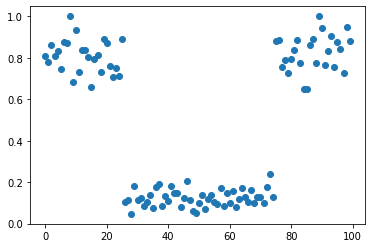

In [12]:

import matplotlib.pyplot as plt


v_cover_order=FR.FLOW(G.edges(),G.nodes(),1)
print(n_s)
xv=[i for i in range(n_s)]

yv=np.zeros((n_s))
for i in range(n_s):
    idx=int(v_cover_order[i,1])
    val=v_cover_order[i,0]
    yv[idx]=val


plt.Figure()
plt.scatter(xv,yv)



Check FlowRank function

In [ ]:
import FlowRank as FR
#print(FR.FLOW_ng(G.edges(),G.nodes(),1)) # (FR, Node#)

node2FR = dict()
for i in FR.FLOW_ng(G.edges(),G.nodes(),1):
    node_num = int(i[1])
    node2FR[node_num] = i[0]

print(node2FR)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}]
Time taken for original Louvain: 0.25952696800231934
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}]
Time taken for our implementation: 1.164757490158081


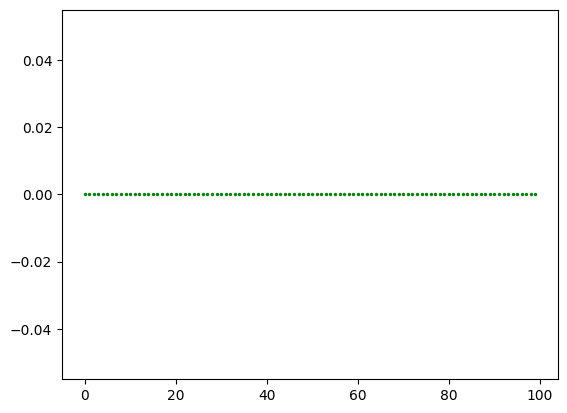

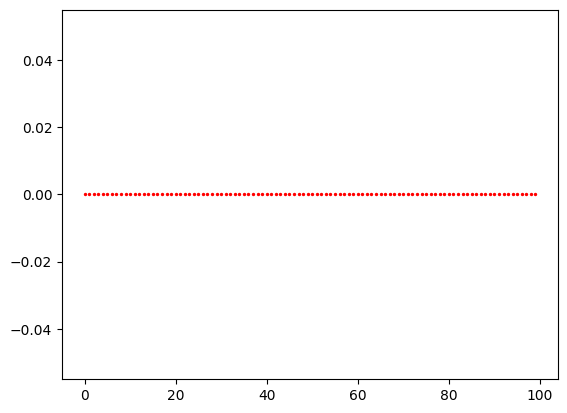

The NMI score of original Louvain compared to true label: 0.0
The NMI score of our implementation compared to true label: 0.0


In [54]:
import debug as debug
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import itertools
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
import Real_Custom

nx_comm.louvain._one_level=debug._one_level


#run time recording
import time
start = time.time()
og_partition = nx_comm.louvain.louvain_partitions(G, resolution=0.9,seed=0)

final_partition_1 = deque(og_partition, maxlen=1).pop()
end = time.time()


print(final_partition_1)

print("Time taken for original Louvain:",end-start)

label_1=np.zeros((n_s))
c=0
for sets in final_partition_1:
    for ell in sets:
        label_1[ell]=c
    
    c=c+1


start = time.time()
partition = Real_Custom.louvain_partitions(G, seed=0)

final_partition_2 = deque(partition, maxlen=1).pop()
end = time.time()
print(final_partition_2)
print("Time taken for our implementation:",end-start)

label_2=np.zeros((n_s))
c=0
for sets in final_partition_2:
    for ell in sets:
        label_2[ell]=c
    c=c+1


xaxis=[i for i in range(n_s)]

plt.Figure()
plt.scatter(xaxis,label_1,s=2,color='green')
plt.show()

plt.Figure()
plt.scatter(xaxis,label_2,s=2,color='red')
plt.show()


print("The NMI score of original Louvain compared to true label:",round(NMI(label,label_1),3))
print("The NMI score of our implementation compared to true label:",round(NMI(label,label_2),3))


## Loading dataset

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from pynndescent import NNDescent
from tqdm import tqdm
import matplotlib.pyplot as plt
# from scanpy import read_h5ad
# import utils
from scipy import sparse

In [11]:
data = sparse.load_npz('I:/내 드라이브/backup/document/USC/Research/MCPC/pca-benchmarks/pca-benchmarks/data/ALM/data.npz')
data = data.todense()
data = np.array(data)


[[  0   0 121 ...   0   0   0]
 [  0   0  79 ...   0   0   0]
 [  0   0 233 ...   0   0   0]
 ...
 [  0   0 308 ...   0   0   0]
 [  0   0 234 ...   0   0   0]
 [  0   0 167 ...   0   0   0]]


In [18]:
#check first few entries of data
#check the first row of data with all columns
np.set_printoptions(threshold=np.inf)
print(data[0,:])

[    0     0   121   171     0    24     4     0    87    70   118   312
     0    10     0   205     1     0     0     0     0     0     0     1
     0    43     0     8     9   104   679     0    59   175    32   652
    47     0    16     0     0     0     0     0     0   238    16     0
     0     0     3    32     0   478     1   149     0     0   138   181
    71    30     0   168     0     9    24     0    30    27     0     9
    27   105   101   611   200    96    22    30     0     0     0    10
     0     0     0     0    34     0    54    63     0     0     0     0
    21     0     0     0     0     0     0     0     0     0     0    12
     0     0     0     0     0     0    30    37     0     0     0    42
     0     0     0     1     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     5     0
     0     0     0     0     0     0    23     0     0     0     0     0
     0     0     0    16     0     0     0     0   